In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [6]:
path = 'dataset-grades'
filename = 'qb_grades.csv'

df = pd.read_csv(os.path.join(path, filename))
df.head(3)

,Player,Year,Race,Report_Count,Mental_Count,Mental_Positive,Mental_Negative,Mental_Net,Athleticism_Count,Athleticism_Positive,...,Tecnique_Negative,Tecnique_Net,NaturalTalent_Count,NaturalTalent_Positive,NaturalTalent_Negative,NaturalTalent_Net,FootballIntelligence_Count,FootballIntelligence_Positive,FootballIntelligence_Negative,FootballIntelligence_Net
0,Chris Leak,2007,Non-White,10,2,0.5,0.5,0.0,3,1.000000,...,0.0,0.0,4,0.25,0.75,-0.5,1,1.0,0.0,1.0
1,John Beck,2007,White,12,2,1.0,0.0,1.0,2,0.000000,...,0.0,1.0,2,1.00,0.00,1.0,2,1.0,0.0,1.0
2,Drew Stanton,2007,White,13,3,1.0,0.0,1.0,7,0.571429,...,1.0,-1.0,1,1.00,0.00,1.0,1,1.0,0.0,1.0


In [7]:
df = df.query('Year >= 2007 & Year <= 2011')
df

,Player,Year,Race,Report_Count,Mental_Count,Mental_Positive,Mental_Negative,Mental_Net,Athleticism_Count,Athleticism_Positive,...,Tecnique_Negative,Tecnique_Net,NaturalTalent_Count,NaturalTalent_Positive,NaturalTalent_Negative,NaturalTalent_Net,FootballIntelligence_Count,FootballIntelligence_Positive,FootballIntelligence_Negative,FootballIntelligence_Net
0,Chris Leak,2007,Non-White,10,2,0.500000,0.500000,0.000000,3,1.000000,...,0.000000,0.000000,4,0.250000,0.750000,-0.500000,1,1.000,0.000,1.00
1,John Beck,2007,White,12,2,1.000000,0.000000,1.000000,2,0.000000,...,0.000000,1.000000,2,1.000000,0.000000,1.000000,2,1.000,0.000,1.00
2,Drew Stanton,2007,White,13,3,1.000000,0.000000,1.000000,7,0.571429,...,1.000000,-1.000000,1,1.000000,0.000000,1.000000,1,1.000,0.000,1.00
3,Matt Flynn,2008,White,38,3,0.666667,0.333333,0.333333,15,0.800000,...,0.000000,1.000000,5,0.400000,0.600000,-0.200000,8,0.875,0.125,0.75
4,Chad Henne,2008,White,45,4,0.250000,0.750000,-0.500000,12,0.250000,...,0.500000,0.000000,14,0.714286,0.285714,0.428571,7,1.000,0.000,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Ryan Mallett,2011,White,48,5,0.600000,0.400000,0.200000,8,0.375000,...,0.260870,0.478261,8,0.750000,0.250000,0.500000,4,0.500,0.500,0.00
67,Blaine Gabbert,2011,White,53,5,0.800000,0.200000,0.600000,12,0.583333,...,0.235294,0.529412,12,0.833333,0.166667,0.666667,7,1.000,0.000,1.00
68,Greg McElroy,2011,White,28,0,0.000000,0.000000,0.000000,7,0.428571,...,0.200000,0.600000,6,0.333333,0.666667,-0.333333,5,0.800,0.200,0.60
69,Terrelle Pryor,2011,Non-White,10,0,0.000000,0.000000,0.000000,3,1.000000,...,0.500000,0.000000,3,1.000000,0.000000,1.000000,0,0.000,0.000,0.00


In [18]:
""" GRADING SYSTEM

'Mental'
	'Leadership_Negative', 'Leadership_Positive', 'Competitor_Negative', 'Competitor_Positive', 
        'Toughness_Negative', 'Toughness_Positive', 'Clutch_Negative', 'Clutch_Positive', 
        'Confidence_Negative', 'Confidence_Positive', 'CharacterIssues'

'Athleticism'
	'RunningAbility_Negative', 'RunningAbility_Positive', 'Athletic_Negative', 'Athletic_Positive',
        'Escapability_Negative', 'Escapability_Positive', 'InjuryConcerns'

'Tecnique'
	'Release_Negative', 'Release_Positive', 'Mechanics_Negative', 'Mechanics_Positive',
        'Footwork_Negative', 'Footwork_Positive', 'Accuracy_Negative', 'Accuracy_Positive'

'Natural_Talent'
        'Armstrength_Negative', 'Armstrength_Positive', 'PlayMaker_Negative', 'PlayMaker_Positive', 
	'Improvisation_Negative', 'Improvisation_Positive', 'Rare_Gifted_Negative', 'Rare_Gifted_Positive', 

'Football_Intelligence'
	'FootballIQ_Negative', 'FootballIQ_Positive', 'Decision_Making_Negative', 'Decision_Making_Positive', 
        'ReadingDefense_Negative', 'ReadingDefense_Positive', 'Progressions_Negative', 'Progressions_Positive',
	'PocketPresence_Negative', 'PocketPresence_Positive' """

" GRADING SYSTEM\n\n'Mental'\n\t'Leadership_Negative', 'Leadership_Positive', 'Competitor_Negative', 'Competitor_Positive', \n        'Toughness_Negative', 'Toughness_Positive', 'Clutch_Negative', 'Clutch_Positive', \n        'Confidence_Negative', 'Confidence_Positive', 'CharacterIssues'\n\n'Athleticism'\n\t'RunningAbility_Negative', 'RunningAbility_Positive', 'Athletic_Negative', 'Athletic_Positive',\n        'Escapability_Negative', 'Escapability_Positive', 'InjuryConcerns'\n\n'Tecnique'\n\t'Release_Negative', 'Release_Positive', 'Mechanics_Negative', 'Mechanics_Positive',\n        'Footwork_Negative', 'Footwork_Positive', 'Accuracy_Negative', 'Accuracy_Positive'\n\n'Natural_Talent'\n        'Armstrength_Negative', 'Armstrength_Positive', 'PlayMaker_Negative', 'PlayMaker_Positive', \n\t'Improvisation_Negative', 'Improvisation_Positive', 'Rare_Gifted_Negative', 'Rare_Gifted_Positive', \n\n'Football_Intelligence'\n\t'FootballIQ_Negative', 'FootballIQ_Positive', 'Decision_Making_Negati

In [19]:
# Create Overall Score
df['Overall_Net'] = ((df['Mental_Net'] * df['Mental_Count']) + (df['Athleticism_Net'] * df['Athleticism_Count']) + (df['Tecnique_Net'] * df['Tecnique_Count']) + (df['NaturalTalent_Net'] * df['NaturalTalent_Count']) + (df['FootballIntelligence_Net'] * df['FootballIntelligence_Count'])) / df['Report_Count']
df['Overall_Positive'] = ((df['Mental_Positive'] * df['Mental_Count']) + (df['Athleticism_Positive'] * df['Athleticism_Count']) + (df['Tecnique_Positive'] * df['Tecnique_Count']) + (df['NaturalTalent_Positive'] * df['NaturalTalent_Count']) + (df['FootballIntelligence_Positive'] * df['FootballIntelligence_Count'])) / df['Report_Count']
df['Overall_Negative'] = ((df['Mental_Negative'] * df['Mental_Count']) + (df['Athleticism_Negative'] * df['Athleticism_Count']) + (df['Tecnique_Negative'] * df['Tecnique_Count']) + (df['NaturalTalent_Negative'] * df['NaturalTalent_Count']) + (df['FootballIntelligence_Negative'] * df['FootballIntelligence_Count'])) / df['Report_Count']

In [20]:
# Separate White and Non-White Players
w = df[df['Race'] == 'White']
nw = df[df['Race'] == 'Non-White']

In [21]:
d = {'Title' : ['Avg. QB: 2007-2011', 'Avg. White QB: 2007-2011', 'Avg. Non-White QB: 2007-2011'],
     'Mental_Net' : [df['Mental_Net'].mean(), w['Mental_Net'].mean(), nw['Mental_Net'].mean()],
     'Athleticism_Net' : [df['Athleticism_Net'].mean(), w['Athleticism_Net'].mean(), nw['Athleticism_Net'].mean()],
     'Tecnique_Net' : [df['Tecnique_Net'].mean(), w['Tecnique_Net'].mean(), nw['Tecnique_Net'].mean()],
     'NaturalTalent_Net' : [df['NaturalTalent_Net'].mean(), w['NaturalTalent_Net'].mean(), nw['NaturalTalent_Net'].mean()],
     'FootballIntelligence_Net' : [df['FootballIntelligence_Net'].mean(), w['FootballIntelligence_Net'].mean(), nw['FootballIntelligence_Net'].mean()],
     'Overall_Net' : [df['Overall_Net'].mean(), w['Overall_Net'].mean(), nw['Overall_Net'].mean()]}

df_net = pd.DataFrame(d)
df_net = df_net[['Title', 'Mental_Net', 'Overall_Net', 'Athleticism_Net', 'Tecnique_Net', 'FootballIntelligence_Net', 'NaturalTalent_Net']]
df_net

,Title,Mental_Net,Overall_Net,Athleticism_Net,Tecnique_Net,FootballIntelligence_Net,NaturalTalent_Net
0,Avg. QB: 2007-2011,0.555019,0.450921,0.242393,0.493935,0.542245,0.223049
1,Avg. White QB: 2007-2011,0.584465,0.405672,0.077256,0.507433,0.565183,0.160905
2,Avg. Non-White QB: 2007-2011,0.461485,0.594651,0.766947,0.451058,0.469382,0.420448


In [22]:
d = {'Title' : ['Avg. QB: 2007-2011', 'Avg. White QB: 2007-2011', 'Avg. Non-White QB: 2007-2011'],
     'Mental_Positive' : [df['Mental_Positive'].mean(), w['Mental_Positive'].mean(), nw['Mental_Positive'].mean()],
     'Athleticism_Positive' : [df['Athleticism_Positive'].mean(), w['Athleticism_Positive'].mean(), nw['Athleticism_Positive'].mean()],
     'Tecnique_Positive' : [df['Tecnique_Positive'].mean(), w['Tecnique_Positive'].mean(), nw['Tecnique_Positive'].mean()],
     'NaturalTalent_Positive' : [df['NaturalTalent_Positive'].mean(), w['NaturalTalent_Positive'].mean(), nw['NaturalTalent_Positive'].mean()],
     'FootballIntelligence_Positive' : [df['FootballIntelligence_Positive'].mean(), w['FootballIntelligence_Positive'].mean(), nw['FootballIntelligence_Positive'].mean()],
     'Overall_Positive' : [df['Overall_Positive'].mean(), w['Overall_Positive'].mean(), nw['Overall_Positive'].mean()]}

df_pos = pd.DataFrame(d)
df_pos = df_pos[['Title', 'Mental_Positive', 'Overall_Positive', 'Athleticism_Positive', 'Tecnique_Positive', 'FootballIntelligence_Positive', 'NaturalTalent_Positive']]
df_pos

,Title,Mental_Positive,Overall_Positive,Athleticism_Positive,Tecnique_Positive,FootballIntelligence_Positive,NaturalTalent_Positive
0,Avg. QB: 2007-2011,0.707087,0.725460,0.621197,0.739925,0.757038,0.597440
1,Avg. White QB: 2007-2011,0.736677,0.702836,0.538628,0.753717,0.782592,0.571193
2,Avg. Non-White QB: 2007-2011,0.613095,0.797325,0.883473,0.696117,0.675867,0.680812


In [23]:
d = {'Title' : ['Avg. QB: 2007-2011', 'Avg. White QB: 2007-2011', 'Avg. Non-White QB: 2007-2011'],
     'Mental_Negative' : [df['Mental_Negative'].mean(), w['Mental_Negative'].mean(), nw['Mental_Negative'].mean()],
     'Athleticism_Negative' : [df['Athleticism_Negative'].mean(), w['Athleticism_Negative'].mean(), nw['Athleticism_Negative'].mean()],
     'Tecnique_Negative' : [df['Tecnique_Negative'].mean(), w['Tecnique_Negative'].mean(), nw['Tecnique_Negative'].mean()],
     'NaturalTalent_Negative' : [df['NaturalTalent_Negative'].mean(), w['NaturalTalent_Negative'].mean(), nw['NaturalTalent_Negative'].mean()],
     'FootballIntelligence_Negative' : [df['FootballIntelligence_Negative'].mean(), w['FootballIntelligence_Negative'].mean(), nw['FootballIntelligence_Negative'].mean()],
     'Overall_Negative' : [df['Overall_Negative'].mean(), w['Overall_Negative'].mean(), nw['Overall_Negative'].mean()]}

df_neg = pd.DataFrame(d)
df_neg = df_neg[['Title', 'Mental_Negative', 'Overall_Negative', 'Athleticism_Negative', 'Tecnique_Negative', 'FootballIntelligence_Negative', 'NaturalTalent_Negative']]
df_neg

,Title,Mental_Negative,Overall_Negative,Athleticism_Negative,Tecnique_Negative,FootballIntelligence_Negative,NaturalTalent_Negative
0,Avg. QB: 2007-2011,0.152068,0.274540,0.378803,0.245990,0.214793,0.374391
1,Avg. White QB: 2007-2011,0.152212,0.297164,0.461372,0.246283,0.217408,0.410288
2,Avg. Non-White QB: 2007-2011,0.151611,0.202675,0.116527,0.245059,0.206486,0.260364


In [24]:
categories_net = ['Mental_Net', 'Overall_Net', 'Athleticism_Net', 'Tecnique_Net', 'FootballIntelligence_Net', 'NaturalTalent_Net']
categories_pos = ['Mental_Positive', 'Overall_Positive', 'Athleticism_Positive', 'Tecnique_Positive', 'FootballIntelligence_Positive', 'NaturalTalent_Positive']
categories_neg = ['Mental_Negative', 'Overall_Negative', 'Athleticism_Negative', 'Tecnique_Negative', 'FootballIntelligence_Negative', 'NaturalTalent_Negative']

In [25]:
# Calculate angles for radar chart
offset = np.pi/6
angles = np.linspace(0, 2*np.pi, len(categories_net) + 1) + offset

In [26]:
# Function to create radar chart
def create_radar_chart(ax, angles, player_data, categories, color='#003594'):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Remove radial labels
    ax.set_yticklabels([])

    # Add Title
    ax.text(np.pi/2, 1.4, player_data[0], ha='center', va='center', size=30, color=color)
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

def get_row_data(data, row):
    return np.asarray(data[data['Title'] == row])[0]

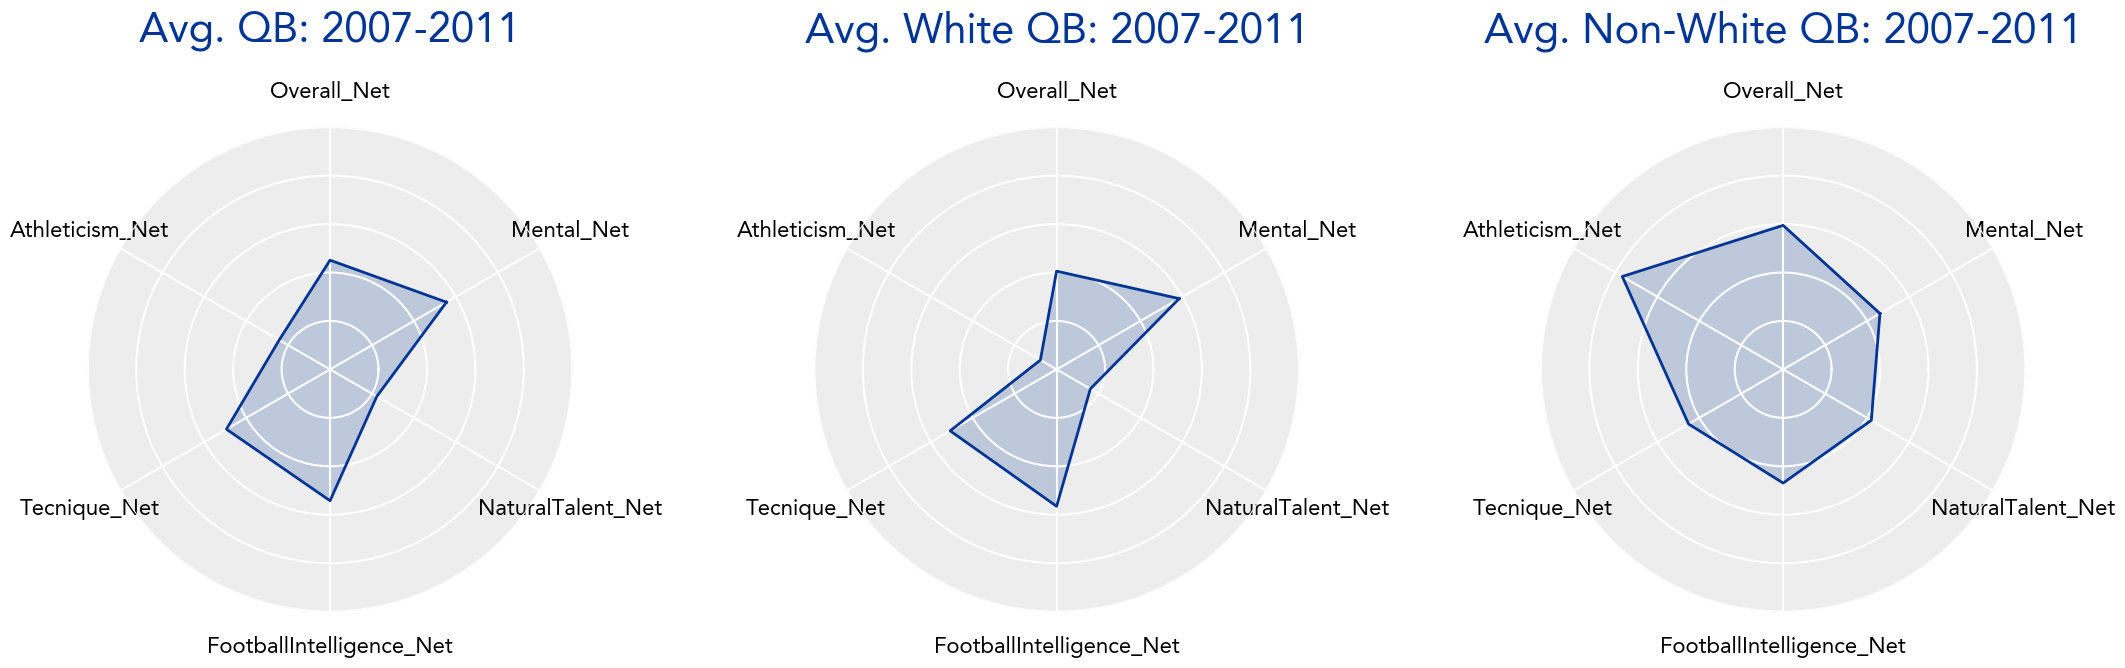

In [27]:
# General plot parameters
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['font.family'] = 'Avenir'

# Create figure
fig = plt.figure(figsize=(25, 20), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(131, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(132, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(133, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
all_data = get_row_data(df_net, 'Avg. QB: 2007-2011')
w_data = get_row_data(df_net, 'Avg. White QB: 2007-2011')
nw_data = get_row_data(df_net, 'Avg. Non-White QB: 2007-2011')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, all_data, categories_net)
ax2 = create_radar_chart(ax2, angles, w_data, categories_net)
ax3 = create_radar_chart(ax3, angles, nw_data, categories_net)

plt.show()

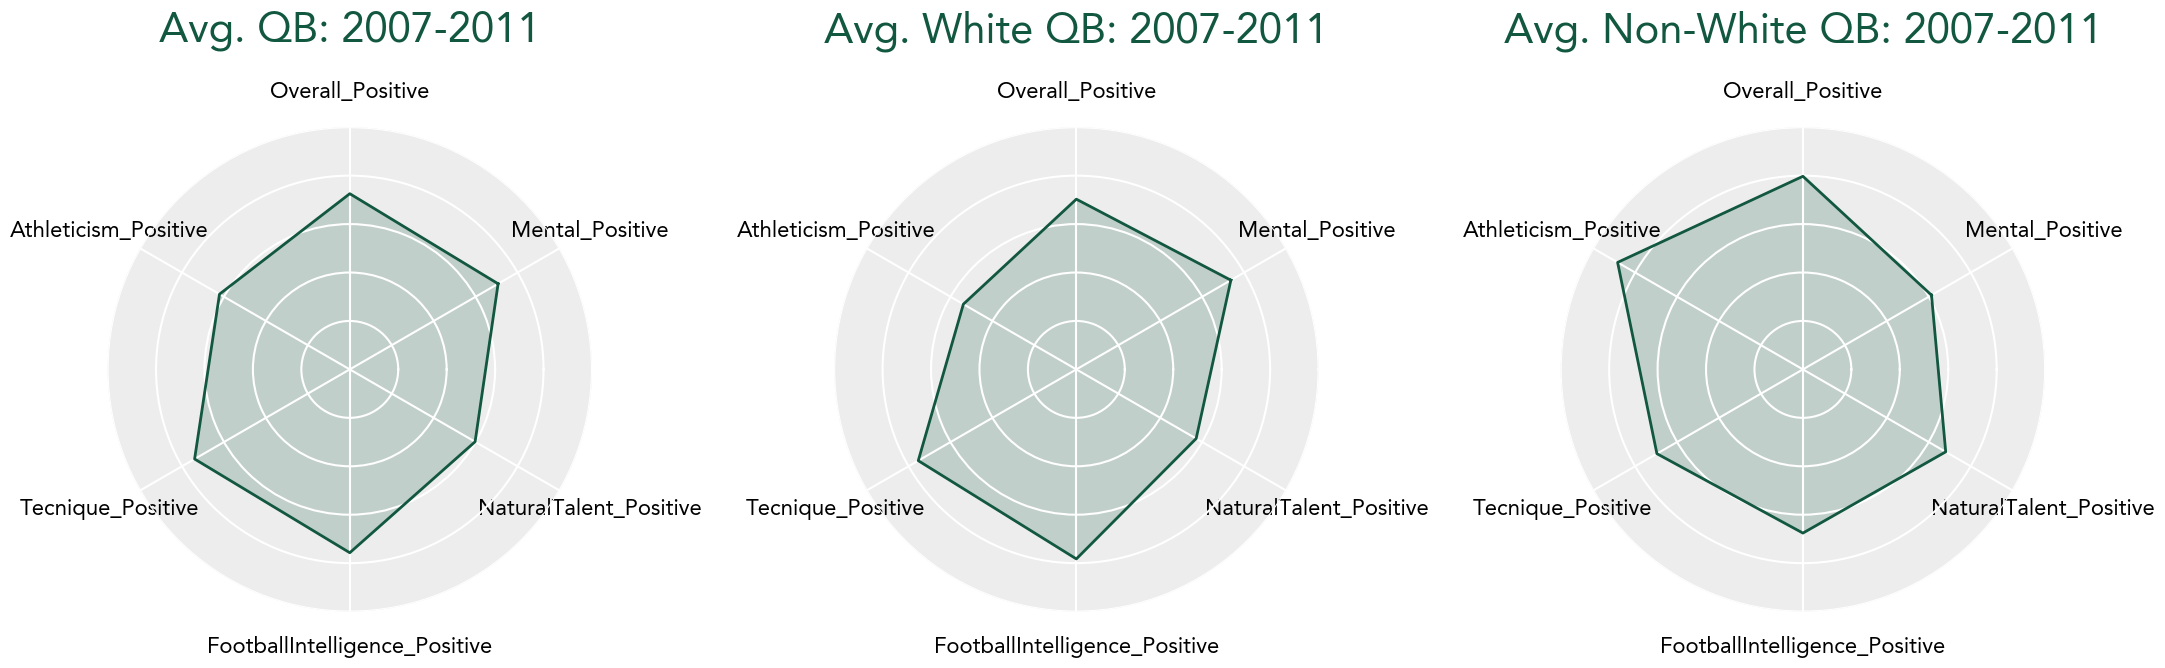

In [28]:
# General plot parameters
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['font.family'] = 'Avenir'

# Create figure
fig = plt.figure(figsize=(25, 20), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(131, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(132, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(133, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
all_data = get_row_data(df_pos, 'Avg. QB: 2007-2011')
w_data = get_row_data(df_pos, 'Avg. White QB: 2007-2011')
nw_data = get_row_data(df_pos, 'Avg. Non-White QB: 2007-2011')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, all_data, categories_pos, color='#125740')
ax2 = create_radar_chart(ax2, angles, w_data, categories_pos, color='#125740')
ax3 = create_radar_chart(ax3, angles, nw_data, categories_pos, color='#125740')

plt.show()

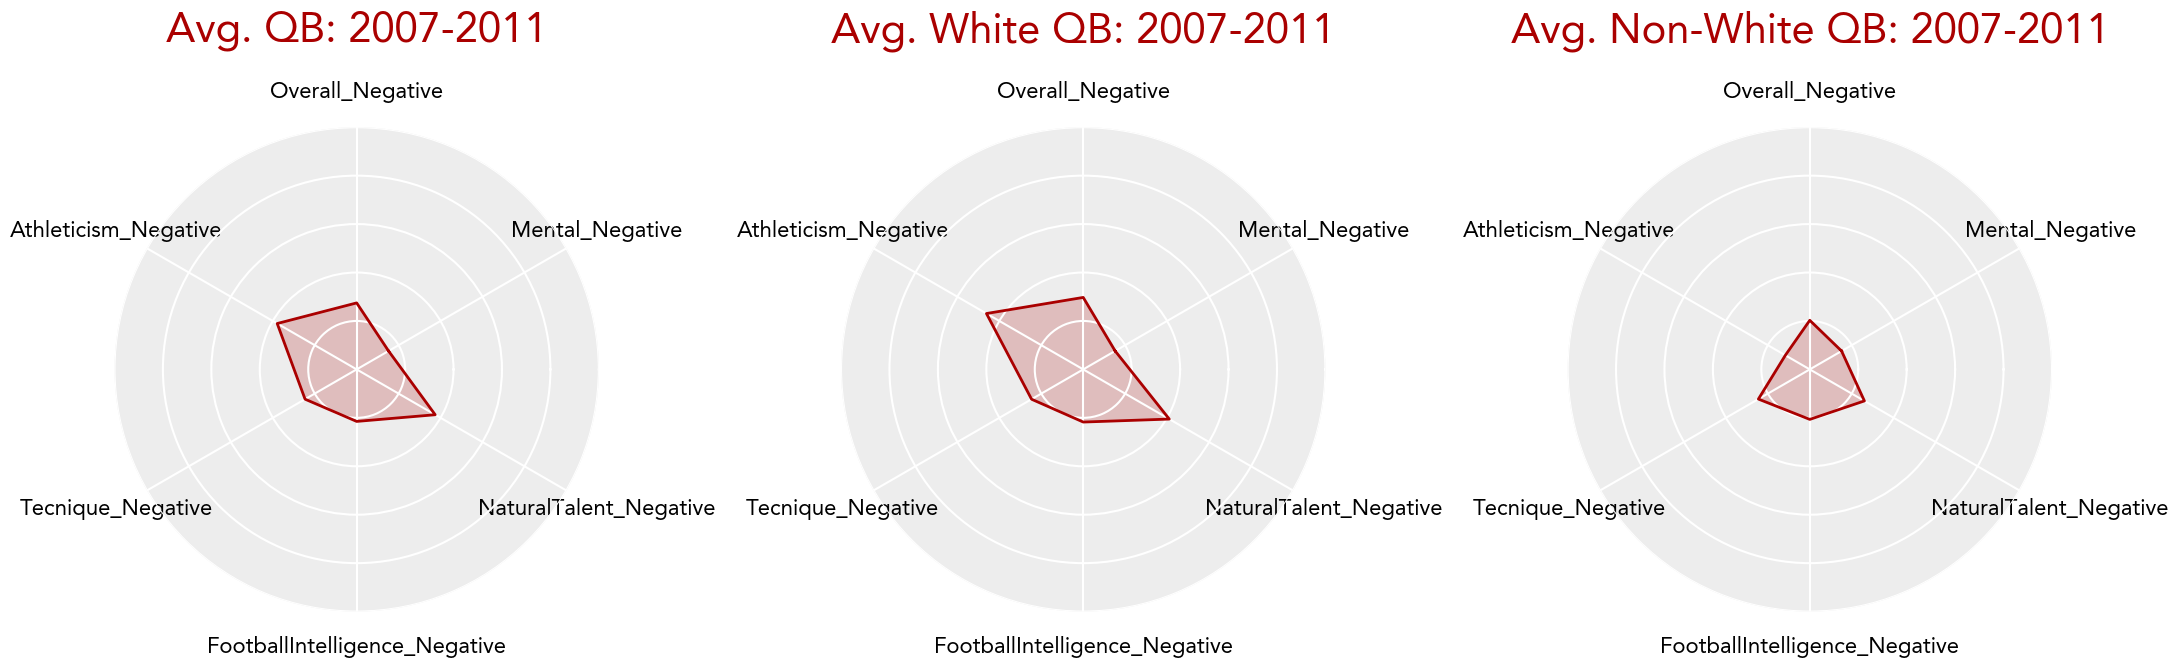

In [29]:
# General plot parameters
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['font.family'] = 'Avenir'

# Create figure
fig = plt.figure(figsize=(25, 20), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(131, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(132, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(133, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
all_data = get_row_data(df_neg, 'Avg. QB: 2007-2011')
w_data = get_row_data(df_neg, 'Avg. White QB: 2007-2011')
nw_data = get_row_data(df_neg, 'Avg. Non-White QB: 2007-2011')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, all_data, categories_neg, color='#aa0000')
ax2 = create_radar_chart(ax2, angles, w_data, categories_neg, color='#aa0000')
ax3 = create_radar_chart(ax3, angles, nw_data, categories_neg, color='#aa0000')

plt.show()